# 🧠 Making Predictions Using Our Previously Trained Model

*In this notebook, we will load our previously trained model and make predictions (classification of digits) to observe how our model is performing in real life scenario*

## 🔹 Importing all the Libraries
*For the same, will import our necessary libraries & modules*
- *numpy* for *padding the image matrix*
- *cv2* for *reading the image as a matrix and perform image processing on it*
- *matplotlib*  for *printing the image from its matrix format*
- *pickel* for *loading the previously trained model*
- *import_ipynb* for *importing a jupyter source file (.ipynb NOT .py file)*
- *module_ann* is our module where the custom MLP class *SingleHiddenLayerNN* is written

In [1]:
import matplotlib.pyplot as plt
import cv2 

In [4]:
import numpy as np

In [7]:
import pickle 
import import_ipynb
from module_ann import SingleHiddenLayerNN


## 🔹 Loading the Model

*We are loading the saved object, which we have trained in another notebook and want to use here. Using pickle, we can load our trained model from the .pkl file*

In [9]:
with open("C:\\ML and DS\\digit_clasification\\Trained Model Binary File\\myDigitClassifier.pkl", "rb") as f :
    model = pickle.load(f)
    

**Why to import the module again when we already have the trained model saved and we can load it ?**

- Pickle stores the object state (like weights, parameters), the module name where the class is defined and the class name also(NOT the entire class body).
- It does not store the class’s code or methods.
- You must have the class code available (imported) when loading.

# **🎯Predicting(Classifying) Hand Written Digits from Images :**
## 🔹Image Preprocessing for Digit Classification

The following snippet of code *reads an image, converts it to grayscale, applies binary inverse thresholding, and displays the processed image*. 

- **Image Reading**: Loads the image in BGR format from the specified path.
- **Grayscale Conversion**: Converts the image to grayscale to simplify processing by removing color information.
- **Thresholding**: Applies binary inverse thresholding with a threshold value of 75. Pixels above 75 are set to black (0), and those below or equal to 75 are set to white (255), highlighting darker digits on a lighter background.
- **Visualization**: Displays the thresholded binary image using `matplotlib` for verification and analysis.

This preprocessing is commonly used in digit classification tasks to enhance the features of interest (e.g., digits) and suppress background noise.


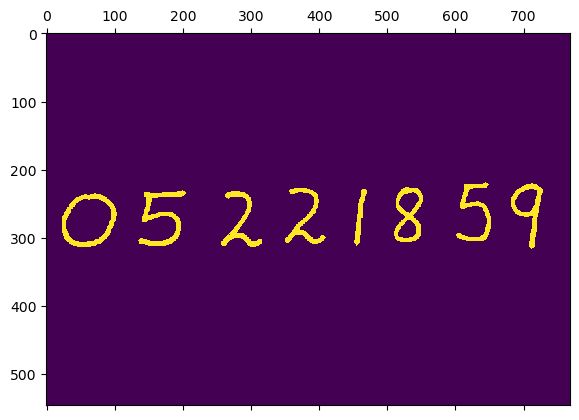

In [2]:
img =  cv2.imread("C:\\ML and DS\\digit_clasification\\0_ru86ka5SAIxQ917T.jpg")
grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
plt.matshow(thresh)
plt.show()

*Here we can see the read image in the above in threshold binary inverted form.*

## 🔹Digit Contour Detection and Preprocessing

This code *extracts individual digits from a binary thresholded image, preprocesses them*, and *visualizes the bounding boxes* on the original image.

- **Contour Detection**: Detects external contours in the thresholded image, which correspond to digit shapes.
- **Sorting**: Sorts contours from left to right based on the x-coordinate of their bounding rectangles to maintain digit order.
- **Bounding Boxes**: For each contour, computes a bounding rectangle and draws it on the original image for visualization.
- **Digit Extraction**: Crops the digit region from the thresholded image using the bounding box.
- **Resizing**: Resizes the cropped digit to 18×18 pixels to standardize size.
- **Padding**: Pads the resized digit with 5 pixels on all sides to make it 28×28 pixels, matching input dimensions of common digit classifiers like MNIST models.
- **Storage**: Appends the processed digit to a list for further classification or analysis.
- **Visualization**: Displays the original image with green bounding boxes around the detected digits.

This step is crucial for isolating and normalizing digit regions before feeding them into a machine learning model.


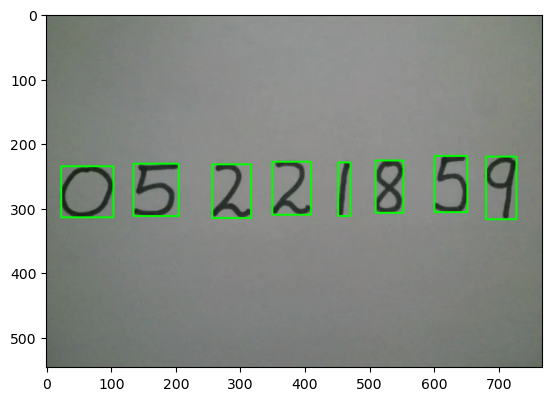

In [5]:
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
preprocessed_digits = []
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    digit = thresh[y:y+h, x:x+w]
    
    resized_digit = cv2.resize(digit, (18,18))
    
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    preprocessed_digits.append(padded_digit)

plt.imshow(img)
plt.show() 

*The bounding boxes (in green) are vivid around the digits*

## 🔹 Predicting the output class of each digit in the image in order
We will *print the predictions* for the individual digits read from the image *in loop*, so that it looks like that our *model is reading an entire handwritten number*

In [10]:
print("The output :", end = " ")
for digit in preprocessed_digits :
    prediction = model.predict(digit.reshape(1,28*28))

    print(prediction[0], end='')

The output : 05228859

**Observation:** One digit is misclassified *(1 misclassified as 8)*

# **🎯Repeating the entire process of image processing and prediction of hand written digits for some more real-life samples :**

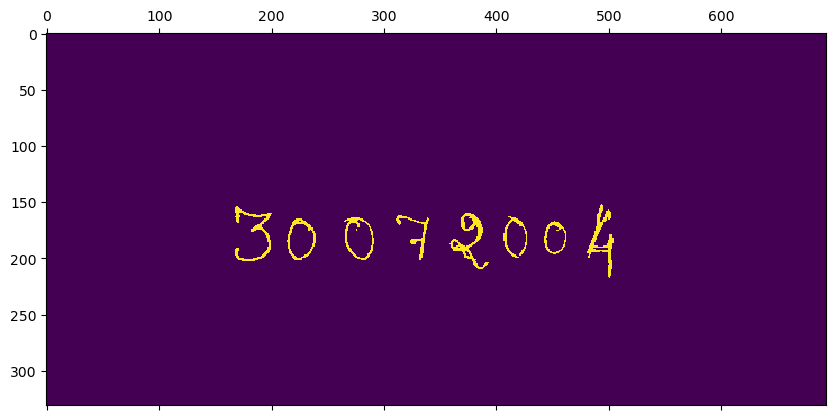

In [11]:
img =  cv2.imread("C:\\ML and DS\\digit_clasification\\WhatsApp Image 2025-04-17 at 20.56.40_f7f12e81.jpg")
grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
plt.matshow(thresh)
plt.show()

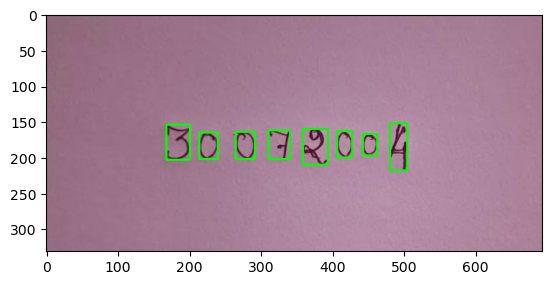

In [12]:
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
preprocessed_digits = []
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    digit = thresh[y:y+h, x:x+w]
    
    resized_digit = cv2.resize(digit, (18,18))
    
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    preprocessed_digits.append(padded_digit)

plt.imshow(img)
plt.show()

In [13]:
print("The output :", end = " ")
for digit in preprocessed_digits :
    prediction = model.predict(digit.reshape(1,28*28))

    print(prediction[0], end='')

The output : 30032004

**Observation:** One digit is misclassified *(7 misclassified as 3)*

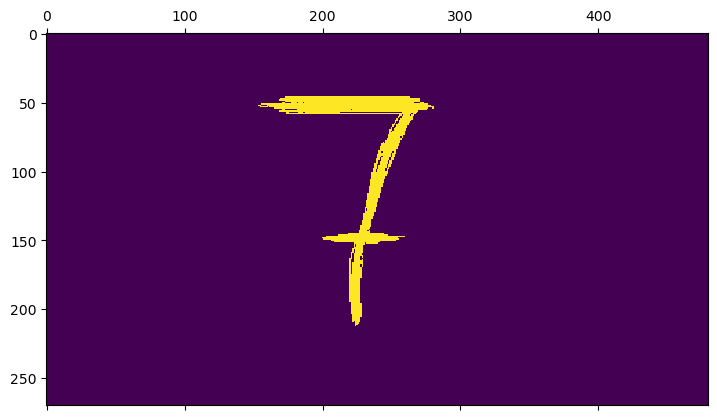

In [15]:
img =  cv2.imread("C:\\ML and DS\\digit_clasification\\1.webp")
grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 185, 255, cv2.THRESH_BINARY_INV)
plt.matshow(thresh)
plt.show()

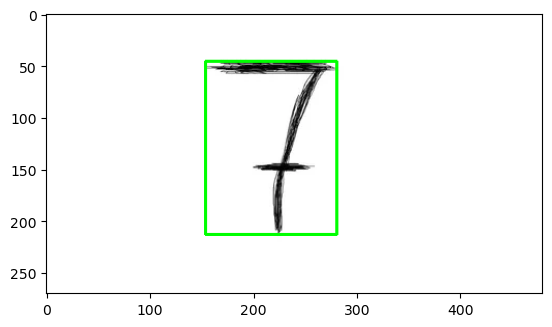

In [16]:
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
preprocessed_digits = []
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    digit = thresh[y:y+h, x:x+w]
    
    resized_digit = cv2.resize(digit, (18,18))
    
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    preprocessed_digits.append(padded_digit)

plt.imshow(img)
plt.show()

In [17]:
print("The output :", end = " ")
for digit in preprocessed_digits :
    prediction = model.predict(digit.reshape(1,28*28))

    print(prediction[0], end='')

The output : 3

**Observation:** Misclassified *(7 misclassified as 3 again)*

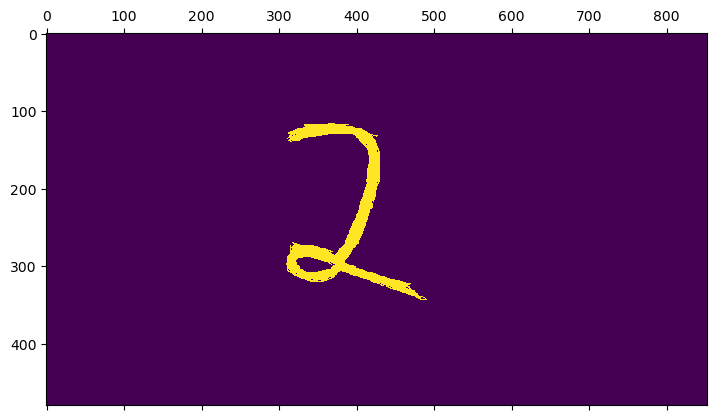

In [18]:
img =  cv2.imread("C:\\ML and DS\\digit_clasification\\2.webp")
grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 185, 255, cv2.THRESH_BINARY_INV)
plt.matshow(thresh)
plt.show()

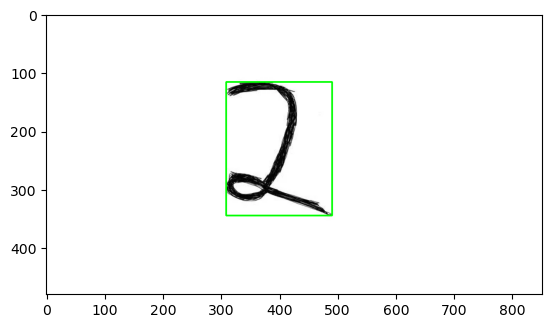

In [19]:
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
preprocessed_digits = []
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    digit = thresh[y:y+h, x:x+w]
    
    resized_digit = cv2.resize(digit, (18,18))
    
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    preprocessed_digits.append(padded_digit)

plt.imshow(img)
plt.show()

In [20]:
print("The output :", end = " ")
for digit in preprocessed_digits :
    prediction = model.predict(digit.reshape(1,28*28))

    print(prediction[0], end='')

The output : 2

**Observation:** Correctly classified *(2 classified as 2)*

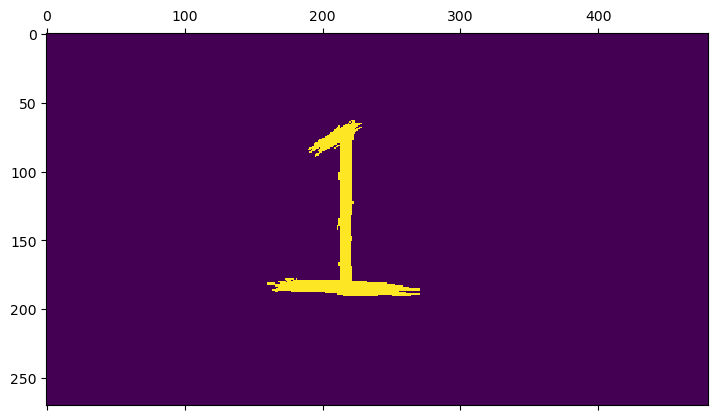

In [21]:
img =  cv2.imread("C:\\ML and DS\\digit_clasification\\1 (1).webp")
grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 185, 255, cv2.THRESH_BINARY_INV)
plt.matshow(thresh)
plt.show()

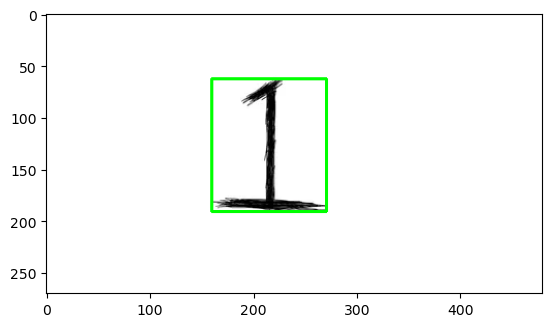

In [22]:
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
preprocessed_digits = []
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    digit = thresh[y:y+h, x:x+w]
    
    resized_digit = cv2.resize(digit, (18,18))
    
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    preprocessed_digits.append(padded_digit)

plt.imshow(img)
plt.show()

In [23]:
print("The output :", end = " ")
for digit in preprocessed_digits :
    prediction = model.predict(digit.reshape(1,28*28))

    print(prediction[0], end='')

The output : 1

**Observation:** Correctly classified *(1 classified as 1)*

# **🎯Conclusion :**

- We tried to make real life precidtions with a *manually implemented MLP with a single layer* coded from scratch *without PyTorch or Keras frameworks*
- The real life images of the numbers are preprocessed in such a way that *individual digits from the numbers are extracted* and *their perdictions were made*. The entire collection of the predicted digits were printed in order to make it *look like our model reads an entire number*, not a single digit.
- Our neural network has a very *simple architecture of a single hidden layer*, which *limits its capability*
- However our model *made some misclassification*, mostly maybe because of its several limitations.
- These faults can be overcome by :
   <br> 1. *Using Convolutional Neural Networks, which are significantly better at feature extraction, parmeter efficiency*
   <br> 2. *Introducing more hidden layers to get more accurate*
   <br> 3. *Using Optimizers(like, Adam), Regularization,  Cross-verification and many other hyperparameter tuning techniques*
   <br> etc.